In [1]:
#Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to suppress all warning messages
import warnings
warnings.filterwarnings("ignore")

In [8]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Reading CSV file
df = pd.read_csv('heart_disease_uci_modified.csv')

# previewing the DataFrame
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
# previewing the DataFrame
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


Number of major vessels (0-3) colored by fluoroscopy (Ca) has the most missing values however age and predicted attribute (num) did not have any missing values. 
The patient ages ranged from 28 to 77. 

In [4]:
# Checking for missing values and categorical variables in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


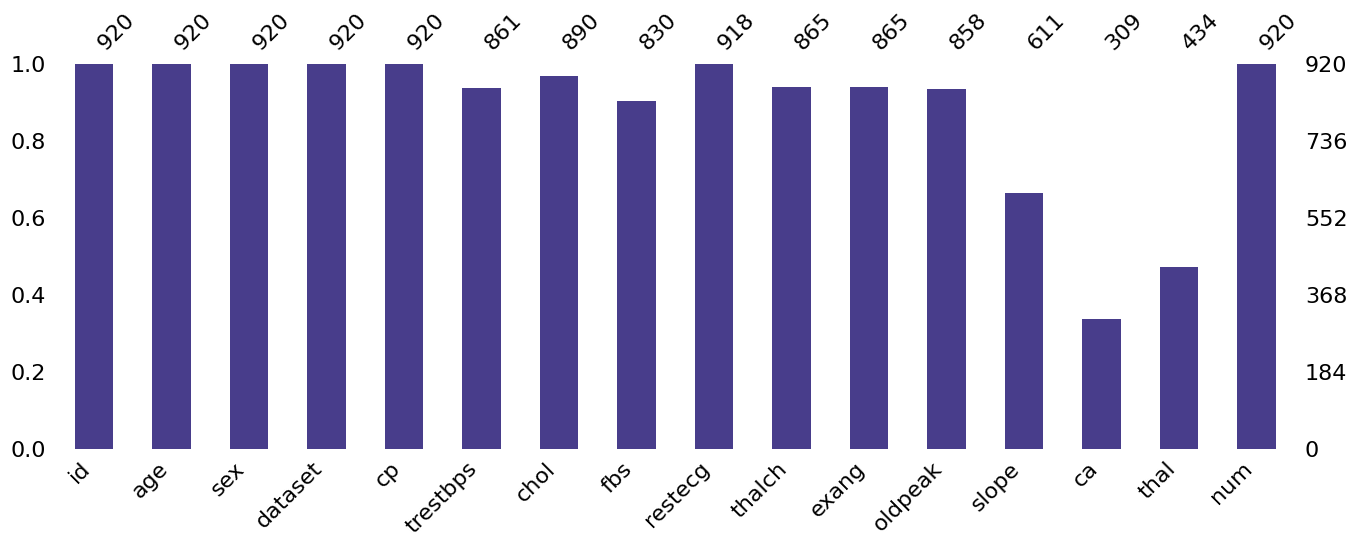

In [5]:
import missingno as msno

# Visualizing the missing values in the dataset
missing_values = msno.bar(df, figsize = (16,5),color = "#483D8B")

Here we can see that there are lot of null values for column slope, ca, thal and some null values for trestbps, chol, fbs, oldpeak, restecg and thalch.

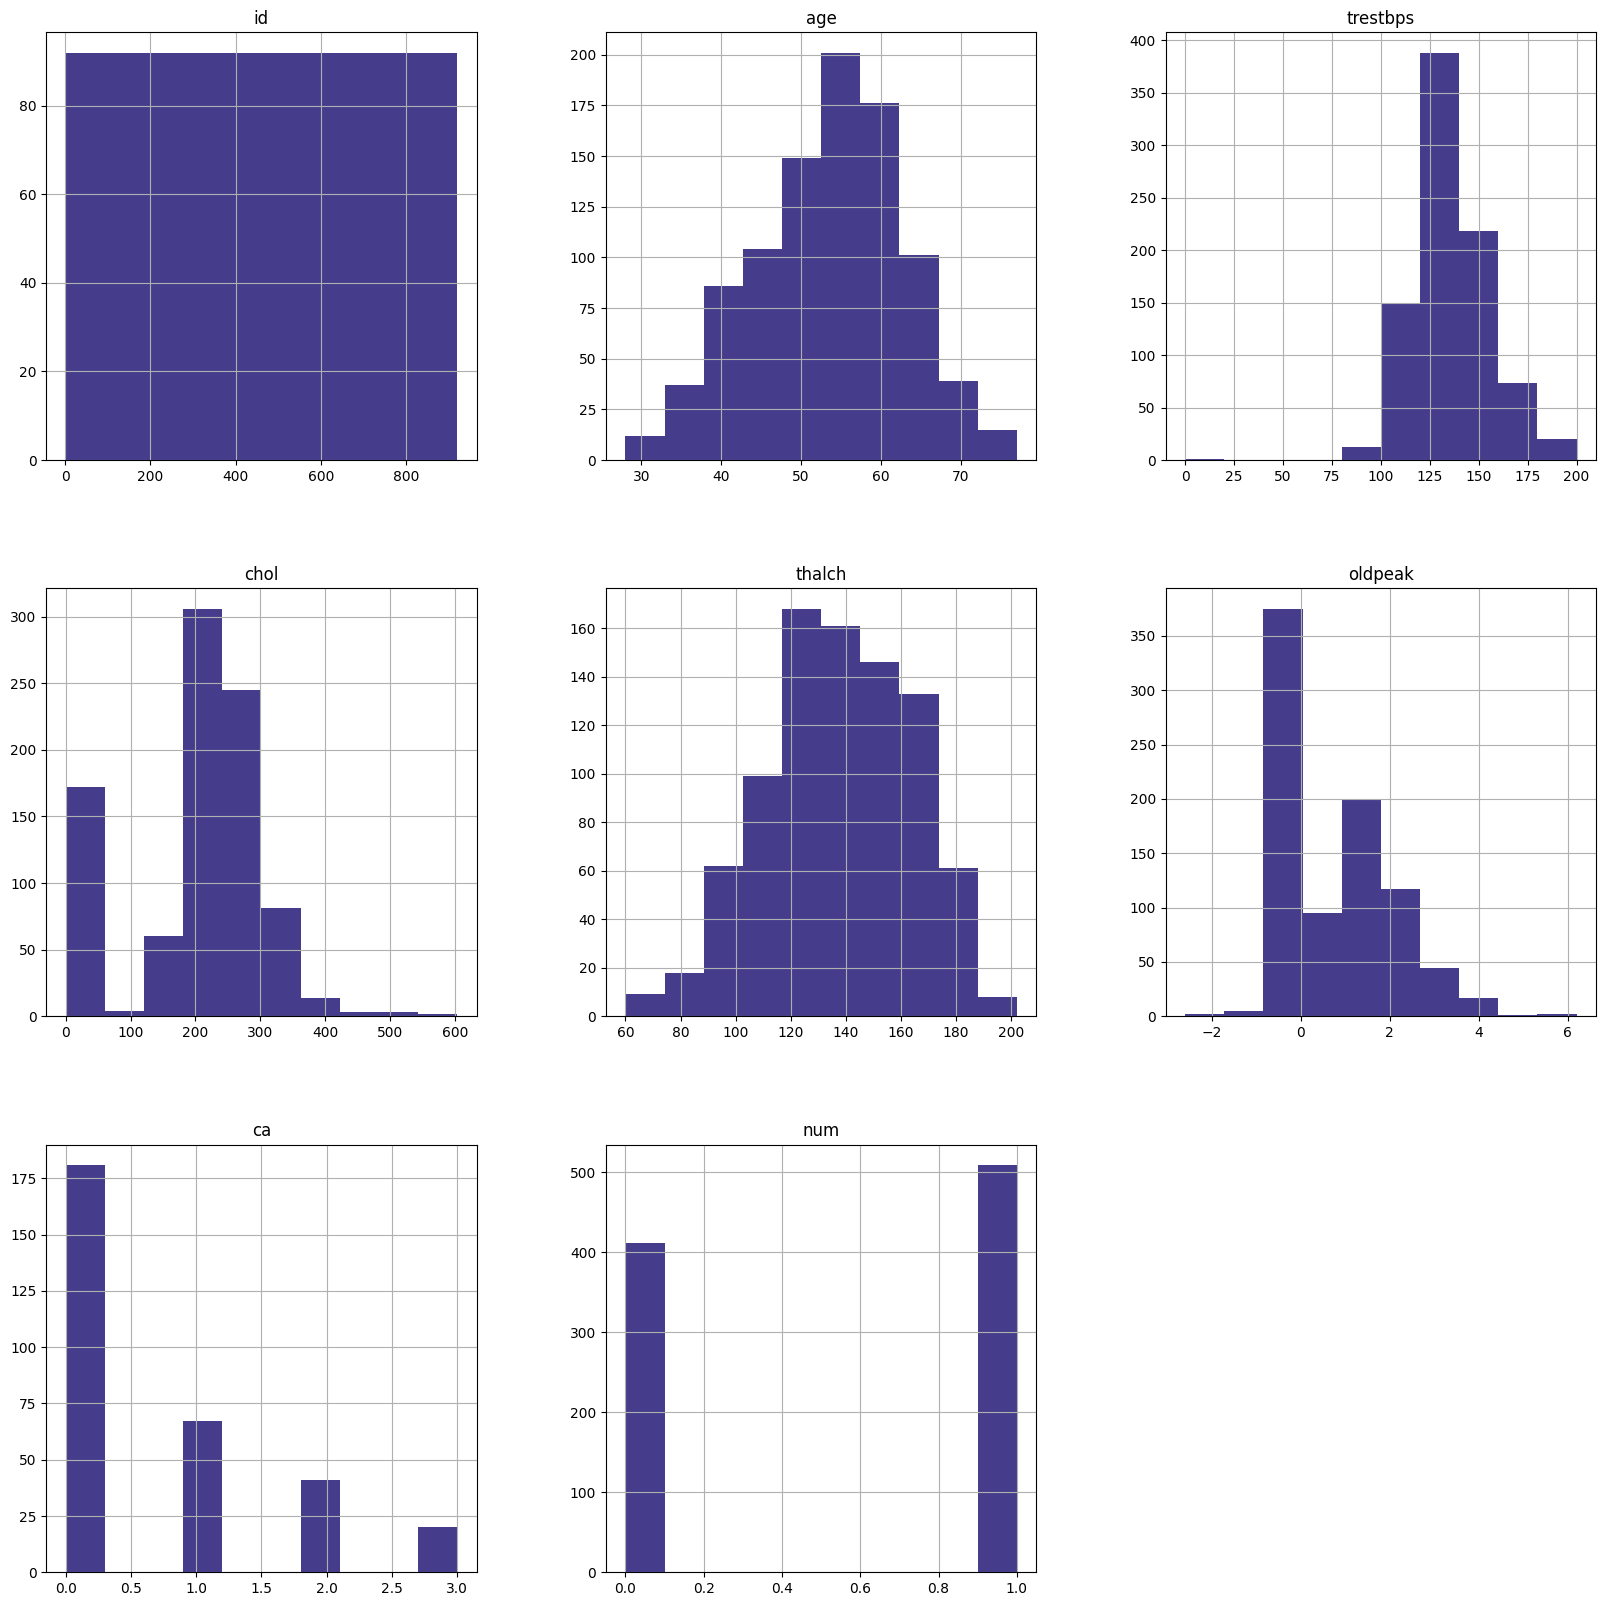

In [6]:
# Evaluating distributions of the features 
hist_plot = df.hist(figsize = (20,20), color = "#453D8B")

Age and thalc have a normal distribution however trestbps is negatively skewed and chol and oldpeak are positively skewed. 

In [39]:
#getting unique values for sex column
num_unique_values = df['sex'].unique()
print(num_unique_values)

['Male' 'Female']


In [29]:
##getting unique values for thal column
num_unique_values = df['thal'].unique()
print(num_unique_values)

['fixed defect' 'normal' 'reversable defect' nan]


In [30]:
##getting unique values for slope column
num_unique_values = df['slope'].unique()
print(num_unique_values)

['downsloping' 'flat' 'upsloping' nan]


In [31]:
##getting unique values for restecg column
num_unique_values = df['restecg'].unique()
print(num_unique_values)

['lv hypertrophy' 'normal' 'st-t abnormality' nan]


In [32]:
##getting unique values for cp column
num_unique_values = df['cp'].unique()
print(num_unique_values)

['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']


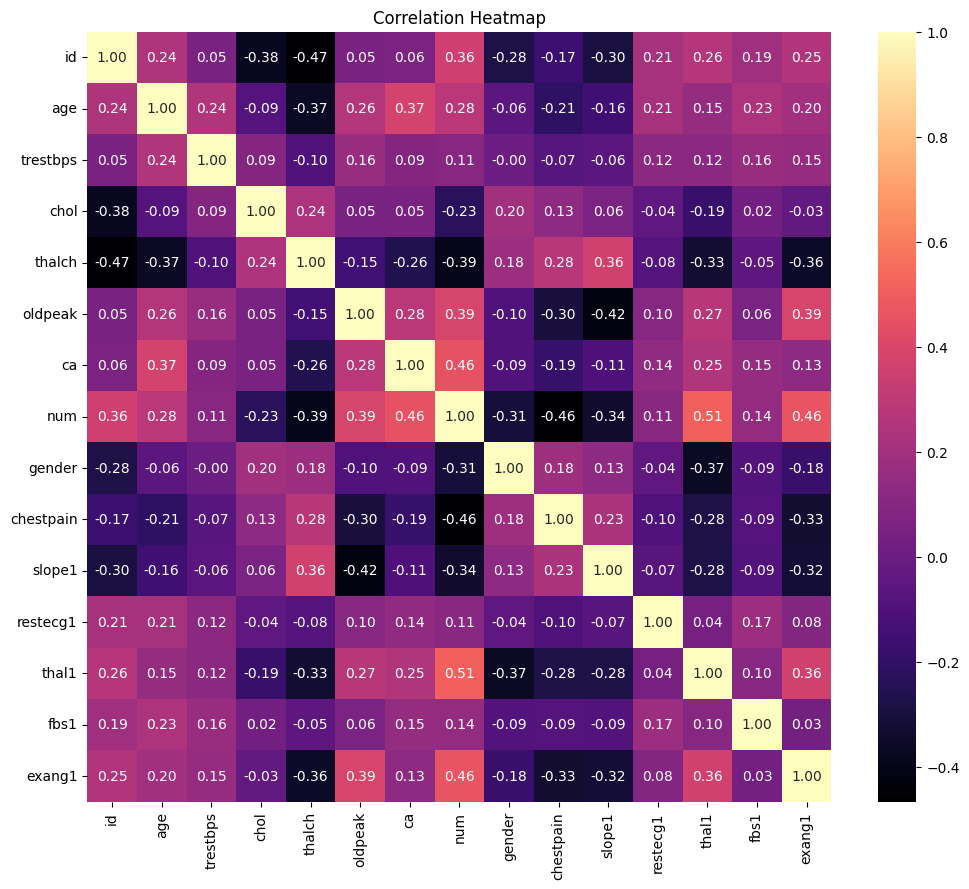

In [7]:
# converting categorical values to numerical values 
df['gender'] = df['sex'].map({'Male': 0, 'Female': 1})
df['chestpain'] = df['cp'].map({'typical angina': 0, 'asymptomatic': 1, 'non-anginal': 2, 'atypical angina': 3})
df['slope1'] = df['slope'].map({'downsloping': 0, 'flat': 1, 'upsloping': 2})
df['restecg1'] = df['restecg'].map({'normal': 0, 'lv hypertrophy': 1, 'st-t abnormality': 2})
df['thal1'] = df['thal'].map({'normal': 0, 'lv fixed defect': 1, 'reversable defect': 2})
df['fbs1'] = df['fbs'].map({False: 0, True: 1})
df['exang1'] = df['exang'].map({False: 0, True: 1})

# Exclude non-numeric columns from the correlation calculation
numerical_columns = df.select_dtypes(include='number')
correlation_matrix = numerical_columns.corr()

# Set up the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="magma", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [8]:
# Get the minimum and maximum age
min_age = df['age'].min()
max_age = df['age'].max()

print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")

Minimum Age: 28
Maximum Age: 77


The age range of patients was 28 to 77, the curve is normally distributed with a standard deviation of 9.42. The highest count of patients was in the 50 to 60 years old age group. 

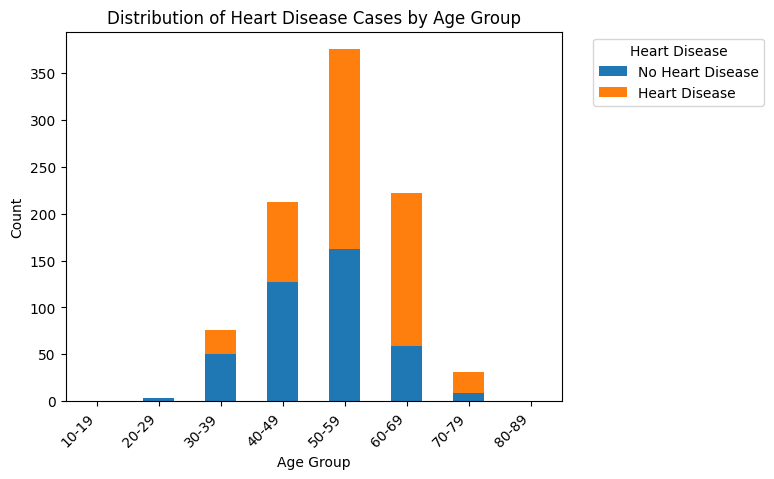

In [9]:

# Group age into bins and calculate the count of heart disease cases (0 and 1) for each age group
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
count_by_age = df.groupby(['age_group', 'num']).size().unstack(fill_value=0)

# Create the grouped bar plot
ax = count_by_age.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Cases by Age Group')
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


THe age group 50 - 59 had the highest reported heart disease. The sample size was also the largest in this age group. However, it is demonstrated that patients in the 50 and older age groups had a higher rate of heart disease whereas, those younger than 50 had a greater count for no heart disease.  

Heart Disease is very common in the age group 60 and above and common among adults which belong to the age group of 41 to 60. However it’s rare among the age group of 28 to 40. There was no documented records of patients syounger than 28. 

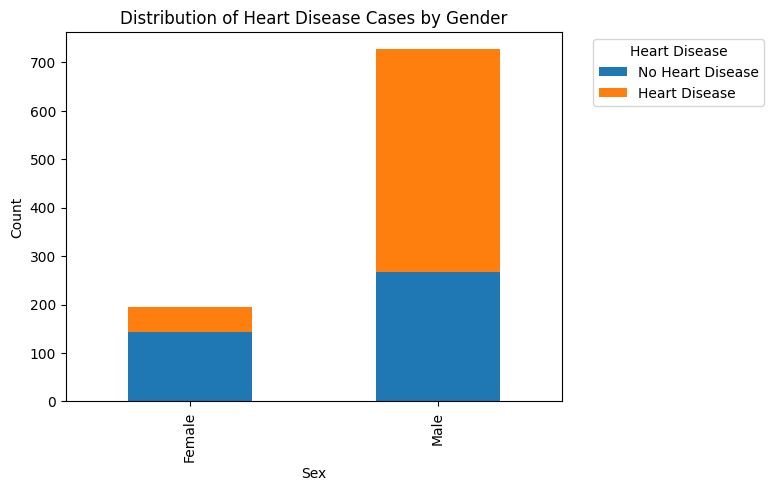

In [10]:
# Convert the "sex" column to numerical values (Male=0, Female=1)
df['sex_numeric'] = df['sex'].map({'Male': 0, 'Female': 1})

# Calculate the count of heart disease cases (0 and 1) for each gender
count_by_sex = df.groupby(['sex', 'num']).size().unstack(fill_value=0)

# Create the grouped bar plot
ax = count_by_sex.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Cases by Gender')

# Adjust the legend position to be outside the chart area
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

The data is skewed by gender. The data set consisted of 726 males and only 194 females. However, the results demonstrate that males are more susceptible to get Heart Disease than females. Males had a 2 to 3 ratio for reported heart disease; whereas women had an approximate 1 to 4 ratio. 

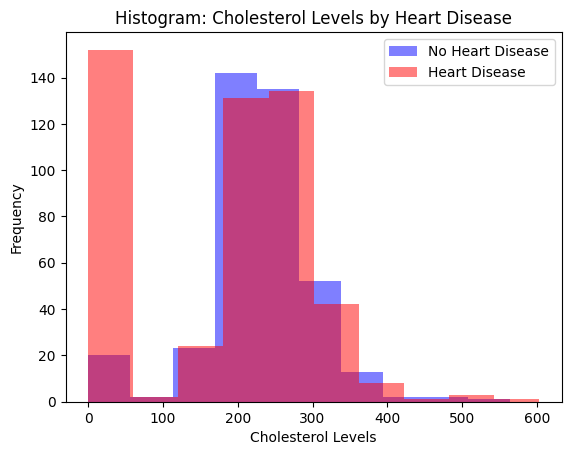

In [11]:
plt.hist(df[df['num'] == 0]['chol'], alpha=0.5, label='No Heart Disease', color='blue')
plt.hist(df[df['num'] == 1]['chol'], alpha=0.5, label='Heart Disease', color='red')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Frequency')
plt.title('Histogram: Cholesterol Levels by Heart Disease')
plt.legend()
plt.show()


The cholestrol values were clustered between the 200 to 300 range. Here we can see that cholesterol level for both patients with heart disease and no heart disease are similar. Hard to notice any major difference. One possible reason is that There many 0 valuse for cholesterol for heart disease patients, that means there is no record of cholesterol for this patients. Cholestrol had some correalation to heart disease. It has a normal distribution with the mean being 199.13 and a high standard deviation of 110.78. In comparison, by ommitting 0 values, the graph became positively skewed, with majority of the values being lower. The mean changed to 246.83 with a lower standard deviation of 58.53. Omitting 0 values from the data analysis represents a more accurate representation of the correlation between cholestrol and heart disease. 

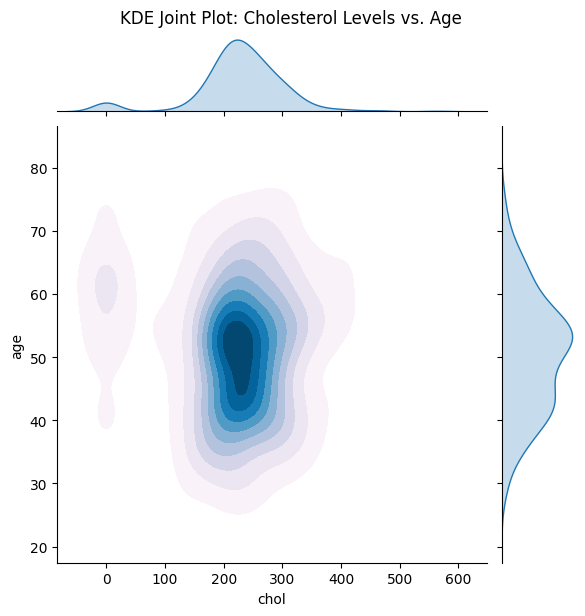

In [12]:
df3 = df[df['num'] == 0 ][['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']]

# Create the joint plot with KDE
g = sns.jointplot(data=df3,
                  x='chol',
                  y='age',
                  kind='kde',
                  cmap='PuBu',
                  fill=True
                  )

# Add the title to the JointGrid object
g.fig.suptitle('KDE Joint Plot: Cholesterol Levels vs. Age', y=1.02)

# Display the plot
plt.show()

Joint plots in seaborn helps us to understand the trend seen among two features. As observed from the above plot we can see that most of the Heart diseased patients in their age of upper 50s or lower 60s tend to have Cholesterol between 200mg/dl to 300mg/dl.

In [13]:
# Group by the "target" column and count the occurrences of True and False for each target value
counts = df.groupby('num')['fbs'].value_counts().unstack(fill_value=0)

print("Counts of True and False for each attribute:")
print(counts)

Counts of True and False for each attribute:
fbs  False  True 
num              
0      353     44
1      339     94


The fasting blood sugar is twice as much for patientes with heart disease versus patients with no reported heart disease. 

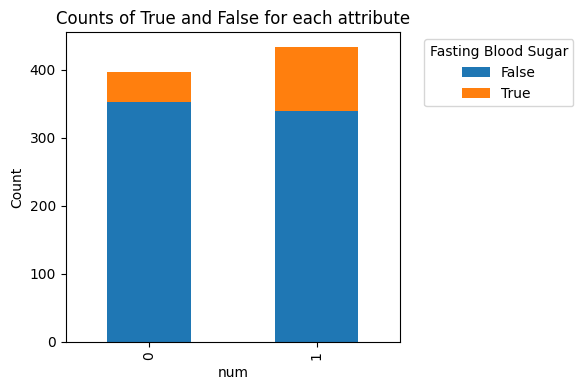

In [14]:
import matplotlib.pyplot as plt

# Group by the "num" column and count the occurrences of True and False for each num value
counts = df.groupby('num')['fbs'].value_counts().unstack(fill_value=0)

# Plot the bar plots
ax = counts.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.xlabel('num')
plt.ylabel('Count')
plt.title('Counts of True and False for each attribute')

# Move the legend to the right side and adjust its position
plt.legend(title='Fasting Blood Sugar', labels=['False', 'True'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


From above analysis of fasting blood sugar it is not quite obivous that fasting blood sugar is related to heart disease. But we can't deny that there is some relation between fasting blood sugar and heart disease. For preventative measure it is important that we consider fasting blood sugar.

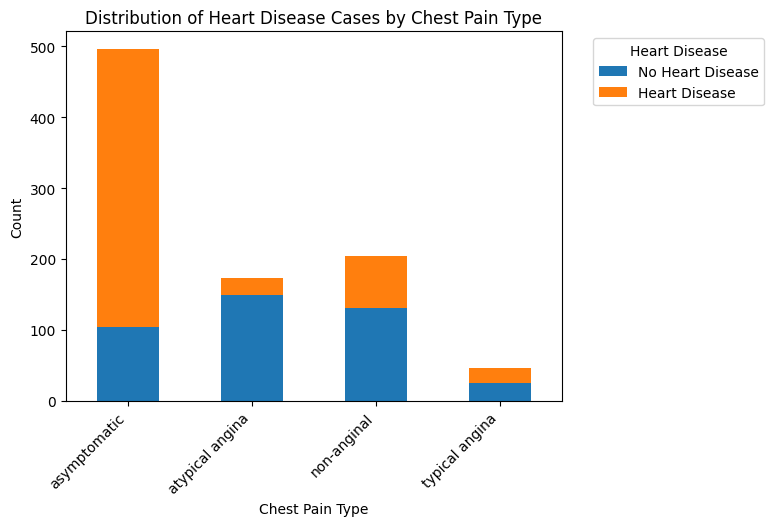

In [15]:
# Group by "cp" and calculate the count of heart disease cases (0 and 1) for each chest pain type
count_by_cp = df.groupby(['cp', 'num']).size().unstack(fill_value=0)

# Create the grouped bar plot
ax = count_by_cp.plot(kind='bar', stacked=True)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Cases by Chest Pain Type')
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

Cp (types of chest pain) demonstrated a high correlation with heart disease.
There are four types of chest pain, asymptomatic, atypical angina, non-anginal pain and typical angina. Most of the Heart Disease patients are found to have asymptomatic chest pain. A asymptomatic attack, like any heart attack, involves, blockage of blood flow to your heart and possible damage to the heart muscle.

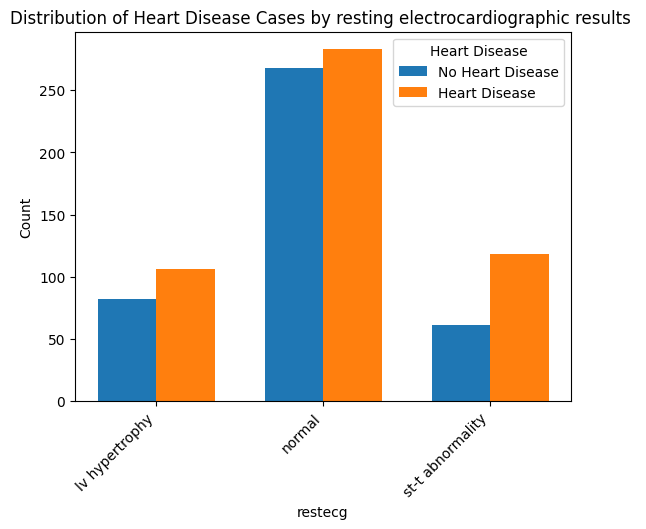

In [16]:
# Group by "restecg" and calculate the count of heart disease cases (0 and 1) for each chest pain type
count_by_cp = df.groupby(['restecg', 'num']).size().unstack(fill_value=0)

# Create the grouped bar plot
width = 0.35
x_positions = range(len(count_by_cp.index))

fig, ax = plt.subplots()
rects1 = ax.bar(x_positions, count_by_cp[0], width, label='No Heart Disease')
rects2 = ax.bar([pos + width for pos in x_positions], count_by_cp[1], width, label='Heart Disease')

# Set the labels for the x-axis ticks
ax.set_xticks([pos + width / 2 for pos in x_positions])
ax.set_xticklabels(count_by_cp.index)

plt.xlabel('restecg')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Cases by resting electrocardiographic results ')
plt.legend(title='Heart Disease')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

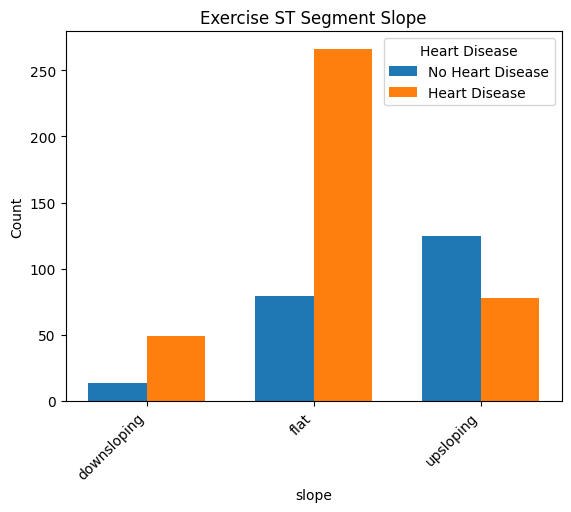

In [17]:
# Group by "restecg" and calculate the count of heart disease cases (0 and 1) for each chest pain type
count_by_cp = df.groupby(['slope', 'num']).size().unstack(fill_value=0)

# Create the grouped bar plot
width = 0.35
x_positions = range(len(count_by_cp.index))

fig, ax = plt.subplots()
rects1 = ax.bar(x_positions, count_by_cp[0], width, label='No Heart Disease')
rects2 = ax.bar([pos + width for pos in x_positions], count_by_cp[1], width, label='Heart Disease')

# Set the labels for the x-axis ticks
ax.set_xticks([pos + width / 2 for pos in x_positions])
ax.set_xticklabels(count_by_cp.index)

plt.xlabel('slope')
plt.ylabel('Count')
plt.title('Exercise ST Segment Slope')
plt.legend(title='Heart Disease')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

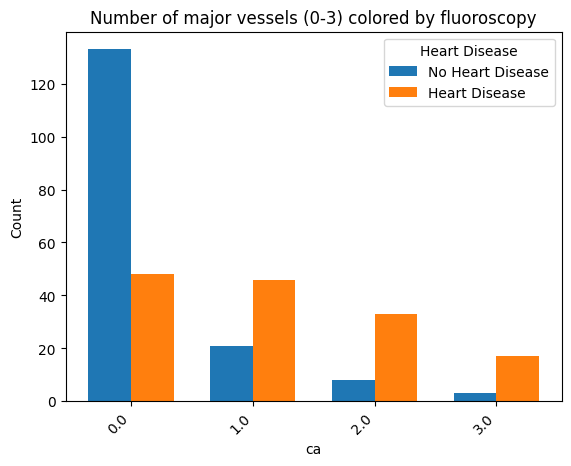

In [18]:
# Group by "restecg" and calculate the count of heart disease cases (0 and 1) for each chest pain type
count_by_cp = df.groupby(['ca', 'num']).size().unstack(fill_value=0)

# Create the grouped bar plot
width = 0.35
x_positions = range(len(count_by_cp.index))

fig, ax = plt.subplots()
rects1 = ax.bar(x_positions, count_by_cp[0], width, label='No Heart Disease')
rects2 = ax.bar([pos + width for pos in x_positions], count_by_cp[1], width, label='Heart Disease')

# Set the labels for the x-axis ticks
ax.set_xticks([pos + width / 2 for pos in x_positions])
ax.set_xticklabels(count_by_cp.index)

plt.xlabel('ca')
plt.ylabel('Count')
plt.title('Number of major vessels (0-3) colored by fluoroscopy')
plt.legend(title='Heart Disease')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

# Data Cleaning

The dataset contains few missing values, to fill these missing values is important because the presence of missing values prevents exact prediction. Using the mean of other values in the attribute, we can replace missing/null values. Here are the steps to fill missing values.

In [19]:
# A copy of original dataset so we don't lose the original info
df_copy= df.copy()

In [20]:
df_copy['trestbps'].isnull().value_counts()

trestbps
False    861
True      59
Name: count, dtype: int64

There are 59 Nan values, Now we will fill these by mean of the 'Resting_Blood_Pressure' column by grouping them with age

In [21]:
mean_value1 = df_copy.groupby('age')['trestbps'].mean()

In [22]:
for i,j in zip(mean_value1.index,mean_value1):
    df_copy.loc[df_copy['age']==i,'trestbps']= df_copy.loc[df_copy['age']==i,'trestbps'].fillna(j)

In [23]:
df_copy['trestbps'].isnull().sum()

0

We have filled the Nan valus with mean of grouping 'trestbps' with 'age' column. It is clean now with no Nan values. And we will do similar process for chol. We can not fill fbs, restecg, exang, slope and thal column's null value because values are categorical so mean or mode is not possible. 

In [24]:
df_copy['chol'].isnull().sum()

30

In [25]:
mean_value2 = df_copy.groupby('age')['chol'].mean()

In [26]:
for i,j in zip(mean_value2.index,mean_value2):
    df_copy.loc[df_copy['age']==i,'chol']= df_copy.loc[df_copy['age']==i,'chol'].fillna(j)

In [27]:
df_copy['chol'].isnull().sum()

0

In [28]:
df_copy['thalch'].isnull().sum()

55

There are 55 Nan values. We are going fill these with mean of these values of that age

In [29]:
mean_value3 = df_copy.groupby('age')['thalch'].mean()

In [30]:
for i,j in zip(mean_value3.index,mean_value3):
    df_copy.loc[df_copy['age']==i,'thalch']= df_copy.loc[df_copy['age']==i,'thalch'].fillna(j)

In [31]:
df_copy['thalch'].isnull().sum()

0